**Importing Important Libraries** 


In [16]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

**Reading the Data**

In [2]:
df = pd.read_csv("/content/data.csv")

**Exploring of the dataset**

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Checking null values**

In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

**Statistical Data**

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Plotting bedroom vs price graph**

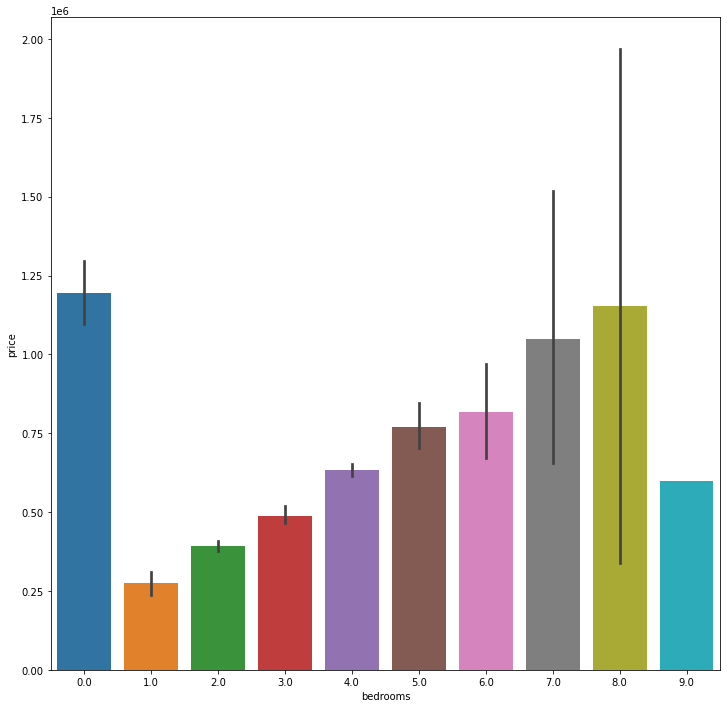

In [ ]:
plt.figure(figsize= (12,12))
sns.barplot(x= 'bedrooms', y='price', data= df)

we can clearly see that price of house is increased with increase in no. of bedrooms  and decrease with increase no. of too many bedrooms ( reason is it is difficult to maintain the house of too many bedroom)

**waterfront vs Price**

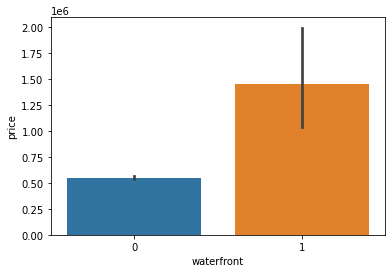

In [ ]:
sns.barplot(x= 'waterfront', y='price', data= df)

houses with waterfront (orange bar) are far more expensive than those without the waterfront (blue bar)

**year bulit vs Price graph**

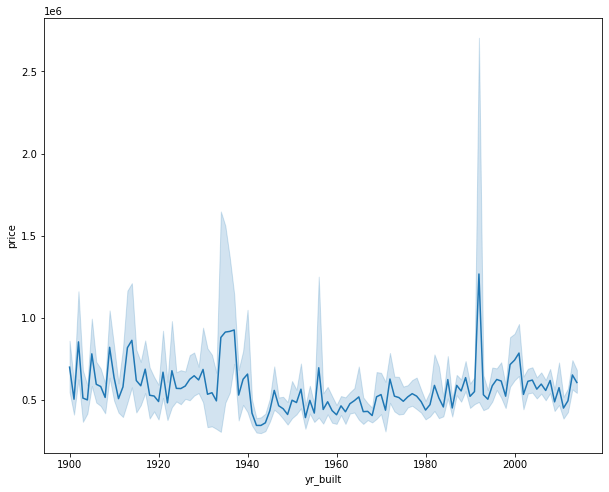

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='yr_built', y='price', data= df)

**Histogram**

we can see that houses that are too old are expensive because they are representing the historical and that are new also expensive . Mid year houses are not expensive 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc277e61cd0>,
      dtype=object)

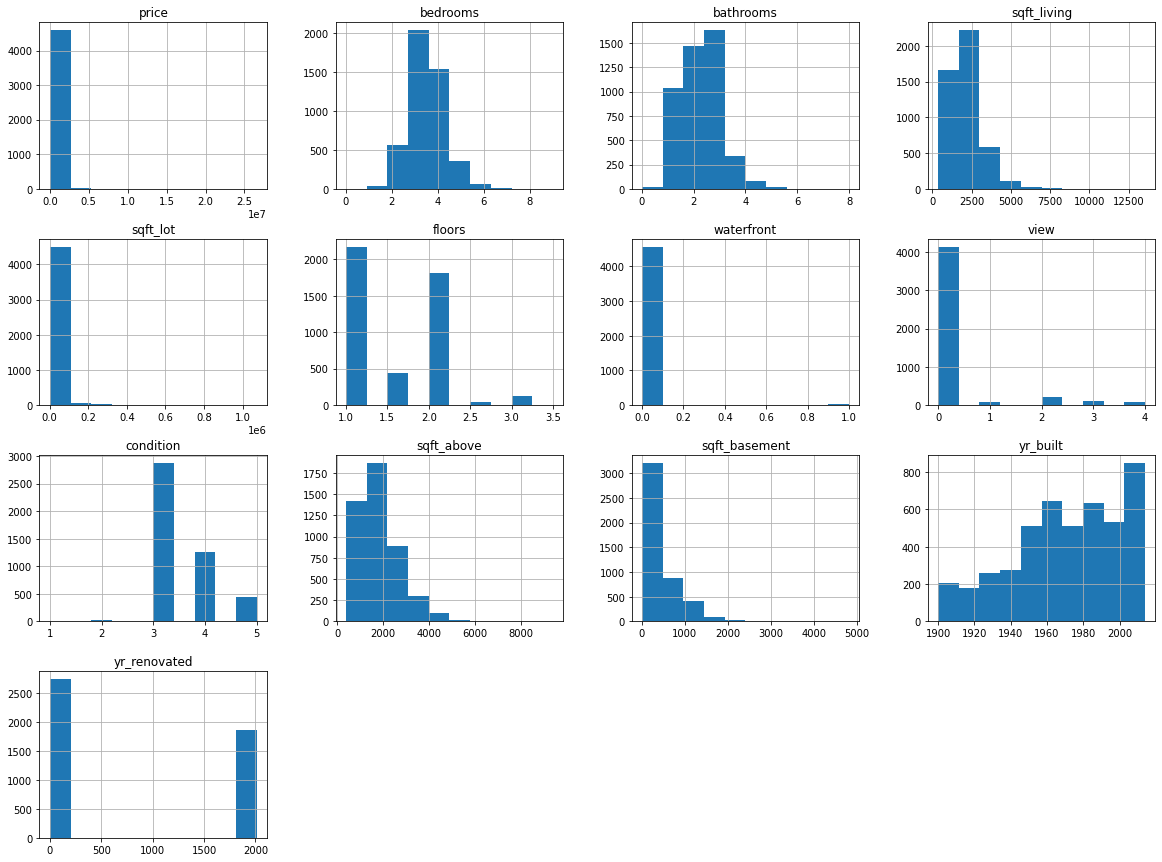

In [5]:
df.hist(figsize=(20,15))

In [9]:
num_var=[col for col in df.columns if df[col].dtype!='O']
print(num_var)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


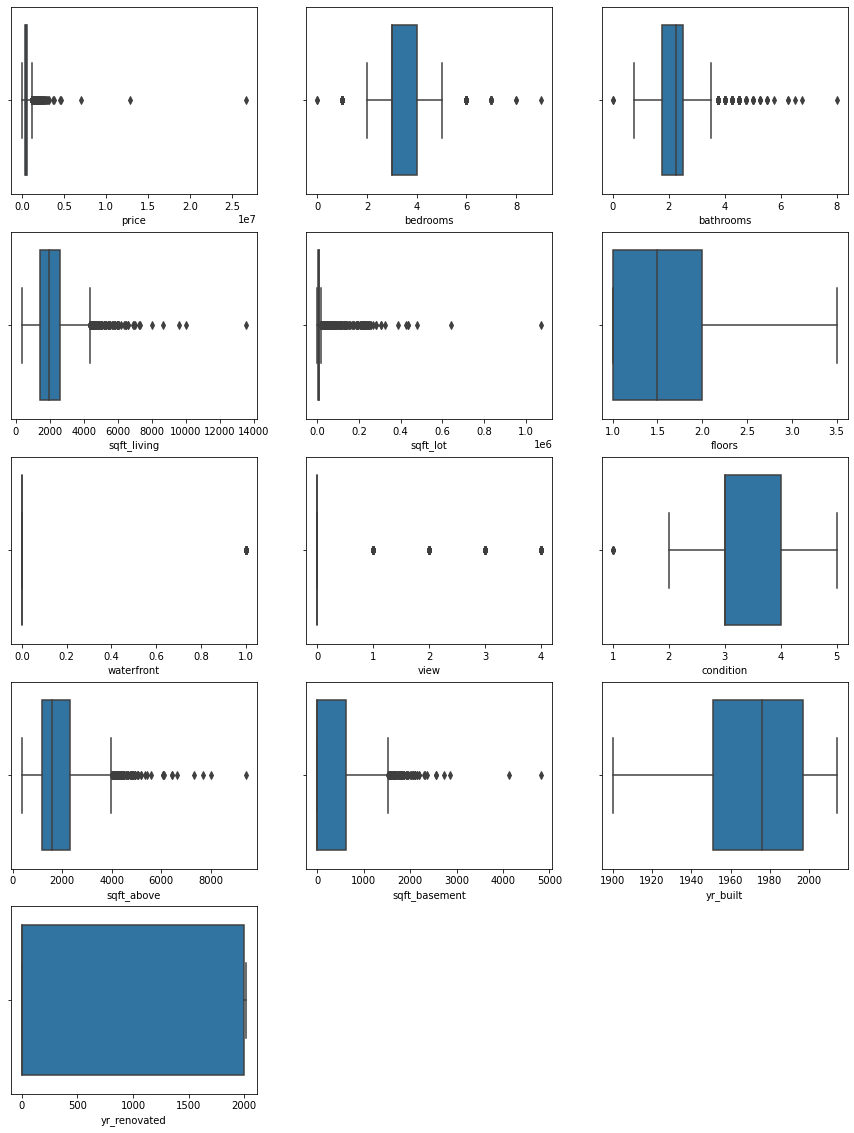

In [10]:
plt.figure(figsize=(15,20))
j=1
for i in num_var:
    plt.subplot(5,3,j)
    sns.boxplot(x=i,data=df)
    j+=1

In [11]:
def outliers(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x 

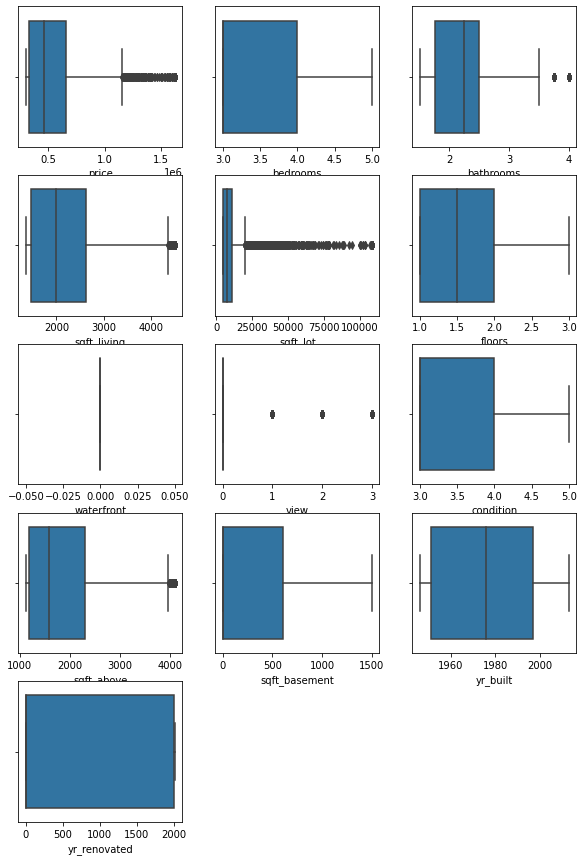

In [13]:
df[num_var]=df[num_var].apply(outliers)
plt.figure(figsize=(10,15))
j=1
for i in num_var :
    plt.subplot(5,3,j)
    sns.boxplot(x=i,data=df)
    j+=1

**Data Pre-processing**

In [18]:
x = df.drop(['price', 'statezip', 'date','street','city','country'], axis=1)
y = df['price']

**Splitting the Dataset into train and test set** 

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

**Importing LinearRegression Algorithm** 

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the price** 

In [26]:
predicted_price = regressor.predict(x_test)

**Evaluating the Model**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error( y_test, predicted_price))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted_price)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_price)))

Mean Absolute Error: 161734.67891308633
Mean Squared Error: 63457491365.32983
Root Mean Squared Error: 251907.70406109025


**Importing the Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

**Predicting the vlaues**

In [ ]:
predict_price = regressor.predict(x_test)

**Evaluating the Random Forest Model**

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error( y_test, predict_price))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predict_price)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predict_price)))

Mean Absolute Error: 170601.7138711115
Mean Squared Error: 88601263630.42487
Root Mean Squared Error: 297659.6439398947


Linear regression gives less MAE, MSE and RMSE. so for Linear Regression is best algorithm for this dataset 